In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Define the base dataset directory

In [74]:
%matplotlib inline
dataset_path = "D:/role_based_recommendation_system/data"
main_folders = ["raw"]

In [75]:


# Function to count images inside a directory (including subdirectories)
def count_images_recursively(directory):
    total_images = 0
    for root, _, files in os.walk(directory):
        total_images += sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))
    return total_images

# Loop through main folders
for main_folder in main_folders:
    path = os.path.join(dataset_path, main_folder)
    
    if os.path.exists(path):
        print(f"📂 {main_folder}")  # Indicate the main folder
        
        # Loop through subdirectories (categories)
        for sub_folder in sorted(os.listdir(path)):
            sub_path = os.path.join(path, sub_folder)
            
            if os.path.isdir(sub_path):  # Only consider directories
                image_count = count_images_recursively(sub_path)
                print(f"   📁 {sub_folder}: {image_count} images")
    else:
        print(f"⚠️ {main_folder} non trouvé!")


📂 raw
   📁 DataAnalyst: 189 images
   📁 clubs: 543 images
   📁 coaches: 818 images
   📁 medical_staff: 529 images
   📁 players: 292 images


In [109]:
import os
import cv2
import numpy as np
import random
from tqdm import tqdm

# Define dataset directories
original_dataset_path = "D:/role_based_recommendation_system/data/raw"
augmented_dataset_path = "D:/role_based_recommendation_system/data/augmented"

# Number of augmented images per original image
augmentations_per_image = 5

# Ensure the augmented dataset directory exists
os.makedirs(augmented_dataset_path, exist_ok=True)

# Function to apply multiple augmentations
def augment_image(image):
    augmented_images = []
    
    for _ in range(augmentations_per_image):
        img = image.copy()
        
        # Apply random transformations
        if random.random() > 0.5:
            img = cv2.flip(img, 1)  # Horizontal flip
        if random.random() > 0.5:
            img = cv2.flip(img, 0)  # Vertical flip
        if random.random() > 0.3:
            angle = random.randint(-30, 30)
            (h, w) = img.shape[:2]
            center = (w // 2, h // 2)
            matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
            img = cv2.warpAffine(img, matrix, (w, h))
        if random.random() > 0.3:
            brightness = random.uniform(0.7, 1.3)
            img = cv2.convertScaleAbs(img, alpha=brightness, beta=0)
        if random.random() > 0.3:
            noise = np.random.randint(0, 50, img.shape, dtype='uint8')
            img = cv2.add(img, noise)
        
        augmented_images.append(img)

    return augmented_images

# Iterate over dataset and apply augmentations
for category in tqdm(os.listdir(original_dataset_path), desc="Augmenting Dataset"):
    category_path = os.path.join(original_dataset_path, category)
    augmented_category_path = os.path.join(augmented_dataset_path, category)

    if os.path.isdir(category_path):
        os.makedirs(augmented_category_path, exist_ok=True)  # Ensure category folder exists in augmented dataset

        image_files = []  # Store image paths

        # Recursively search for images in subdirectories
        for root, _, files in os.walk(category_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_files.append(os.path.join(root, file))

        if not image_files:
            print(f"⚠️ No images found in category '{category}', skipping augmentation.")
            continue
        else:
            print(f"✔️ Found {len(image_files)} images in '{category}' (including subfolders)")

        for img_path in image_files:
            img = cv2.imread(img_path)

            if img is None:
                print(f"⚠️ Skipping unreadable image: {img_path}")
                continue

            # Resize to standard size (optional)
            img = cv2.resize(img, (224, 224))

            # Preserve subfolder structure inside augmented dataset
            relative_subpath = os.path.relpath(img_path, original_dataset_path)
            augmented_image_path = os.path.join(augmented_dataset_path, relative_subpath)
            os.makedirs(os.path.dirname(augmented_image_path), exist_ok=True)

            # Save the original image to the augmented folder
            cv2.imwrite(augmented_image_path, img)

            # Generate augmented images
            augmented_images = augment_image(img)

            # Save augmented images
            for idx, aug_img in enumerate(augmented_images):
                aug_filename = f"aug_{idx}_{os.path.basename(img_path)}"
                aug_save_path = os.path.join(os.path.dirname(augmented_image_path), aug_filename)
                cv2.imwrite(aug_save_path, aug_img)

                # Verify if augmented image was saved
                if not os.path.exists(aug_save_path):
                    print(f"❌ ERROR: Failed to save augmented image '{aug_filename}'!")
                else:
                    print(f"✔️ Saved: {aug_save_path}")

print("✅ Data augmentation completed! Check 'D:/role_based_recommendation_system/data/augmented' for images.")


Augmenting Dataset:   0%|          | 0/5 [00:00<?, ?it/s]

✔️ Found 543 images in 'clubs' (including subfolders)
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_0_image_1.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_1_image_1.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_2_image_1.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_3_image_1.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_4_image_1.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_0_image_10.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_1_image_10.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_2_image_10.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\football_events\aug_3_image_10.jpg
✔️ Saved: D:/role_based_recommend

Augmenting Dataset:  20%|██        | 1/5 [00:07<00:28,  7.22s/it]

✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_0_san_siro.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_1_san_siro.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_2_san_siro.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_3_san_siro.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_4_san_siro.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_0_soty-ad-hoc-Arena.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_1_soty-ad-hoc-Arena.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_2_soty-ad-hoc-Arena.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_3_soty-ad-hoc-Arena.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\clubs\stadiums\aug_4_soty-ad-hoc-Arena.jpg
✔️ Sa

Augmenting Dataset:  40%|████      | 2/5 [00:18<00:28,  9.55s/it]

✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_1_image_57.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_2_image_57.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_3_image_57.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_4_image_57.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_0_image_6.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_1_image_6.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_2_image_6.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_3_image_6.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_images\aug_4_image_6.jpg
✔️ Saved: D:/role_based_recommendation_system/data/augmented\coaches\tactics_i

Augmenting Dataset:  60%|██████    | 3/5 [00:22<00:13,  6.84s/it]

✔️ Saved: D:/role_based_recommendation_system/data/augmented\DataAnalyst\Dashboards\aug_2_The Numbers Game _ How Data Is Changing Football _ Documentary 4-38 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\DataAnalyst\Dashboards\aug_3_The Numbers Game _ How Data Is Changing Football _ Documentary 4-38 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\DataAnalyst\Dashboards\aug_4_The Numbers Game _ How Data Is Changing Football _ Documentary 4-38 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\DataAnalyst\Dashboards\aug_0_The Numbers Game _ How Data Is Changing Football _ Documentary 4-39 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\DataAnalyst\Dashboards\aug_1_The Numbers Game _ How Data Is Changing Football _ Documentary 4-39 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\DataAnalyst\Dashboards\aug_2_The Numbers Game _ How Data Is Changing Footb

Augmenting Dataset:  80%|████████  | 4/5 [00:29<00:07,  7.01s/it]

✔️ Saved: D:/role_based_recommendation_system/data/augmented\medical_staff\Medical_examinations\aug_3_What happens at a football medical_ _ INSIDE FC Bayern 7-29 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\medical_staff\Medical_examinations\aug_4_What happens at a football medical_ _ INSIDE FC Bayern 7-29 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\medical_staff\Medical_examinations\aug_0_What happens at a football medical_ _ INSIDE FC Bayern 8-0 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\medical_staff\Medical_examinations\aug_1_What happens at a football medical_ _ INSIDE FC Bayern 8-0 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\medical_staff\Medical_examinations\aug_2_What happens at a football medical_ _ INSIDE FC Bayern 8-0 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\medical_staff\Medical_examinations\aug_3_What happens at 

Augmenting Dataset: 100%|██████████| 5/5 [00:34<00:00,  6.98s/it]

✔️ Saved: D:/role_based_recommendation_system/data/augmented\players\Healthy_Food\aug_1_What No. 2 NFL Draft Pick Jayden Daniels Eats in a Day _ GQ Sports 1-24 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\players\Healthy_Food\aug_2_What No. 2 NFL Draft Pick Jayden Daniels Eats in a Day _ GQ Sports 1-24 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\players\Healthy_Food\aug_3_What No. 2 NFL Draft Pick Jayden Daniels Eats in a Day _ GQ Sports 1-24 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\players\Healthy_Food\aug_4_What No. 2 NFL Draft Pick Jayden Daniels Eats in a Day _ GQ Sports 1-24 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\players\Healthy_Food\aug_0_What No. 2 NFL Draft Pick Jayden Daniels Eats in a Day _ GQ Sports 1-50 screenshot.png
✔️ Saved: D:/role_based_recommendation_system/data/augmented\players\Healthy_Food\aug_1_What No. 2 NFL Draft Pick Jayden Dani

In [101]:
import os

# Define dataset paths before and after augmentation
original_dataset_path = "D:/role_based_recommendation_system/data/raw"  
augmented_dataset_path = "D:/role_based_recommendation_system/data/augmented"

# Function to count images in each category and handle missing directories
def count_images_in_folders(base_path):
    if not os.path.exists(base_path):
        print(f"❌ Path does not exist: {base_path}")
        return {}, 0

    folder_counts = {}
    total_images = 0

    for root, _, files in os.walk(base_path):
        image_count = sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))

        if image_count > 0:
            relative_path = os.path.relpath(root, base_path)
            folder_counts[relative_path] = image_count
            total_images += image_count

    return folder_counts, total_images

# Count images before augmentation
original_counts, original_total = count_images_in_folders(original_dataset_path)

# Count images after augmentation
augmented_counts, augmented_total = count_images_in_folders(augmented_dataset_path)

# Print dataset sizes
if original_total > 0:
    print(f"📊 **Dataset Size Before Augmentation**: {original_total} images")
    for category, count in original_counts.items():
        print(f"   📂 {category}: {count} images")
else:
    print("❌ No images found in the original dataset!")

if augmented_total > 0:
    print(f"\n📊 **Dataset Size After Augmentation**: {augmented_total} images")
    for category, count in augmented_counts.items():
        print(f"   📂 {category}: {count} images")
else:
    print("❌ No images found in the augmented dataset!")


📊 **Dataset Size Before Augmentation**: 2371 images
   📂 clubs\football_events: 139 images
   📂 clubs\marchandise_images: 113 images
   📂 clubs\stadiums: 291 images
   📂 coaches\Conferences: 203 images
   📂 coaches\Match_Highlights: 329 images
   📂 coaches\tactics_images: 286 images
   📂 DataAnalyst\Dashboards: 189 images
   📂 medical_staff\Injuries: 178 images
   📂 medical_staff\Medical_examinations: 351 images
   📂 players\Healthy_Food: 292 images

📊 **Dataset Size After Augmentation**: 12474 images
   📂 clubs: 2682 images
   📂 coaches: 4248 images
   📂 DataAnalyst: 960 images
   📂 medical_staff: 2976 images
   📂 players: 1608 images



📊 **Dataset Image Counts After Augmentation:**
                          Category  Number of Images
             clubs\football_events               834
          clubs\marchandise_images               678
                    clubs\stadiums              1722
               coaches\Conferences               786
          coaches\Match_Highlights              1746
            coaches\tactics_images              1716
            DataAnalyst\Dashboards               960
            medical_staff\Injuries              1068
medical_staff\Medical_examinations              1908
              players\Healthy_Food              1608


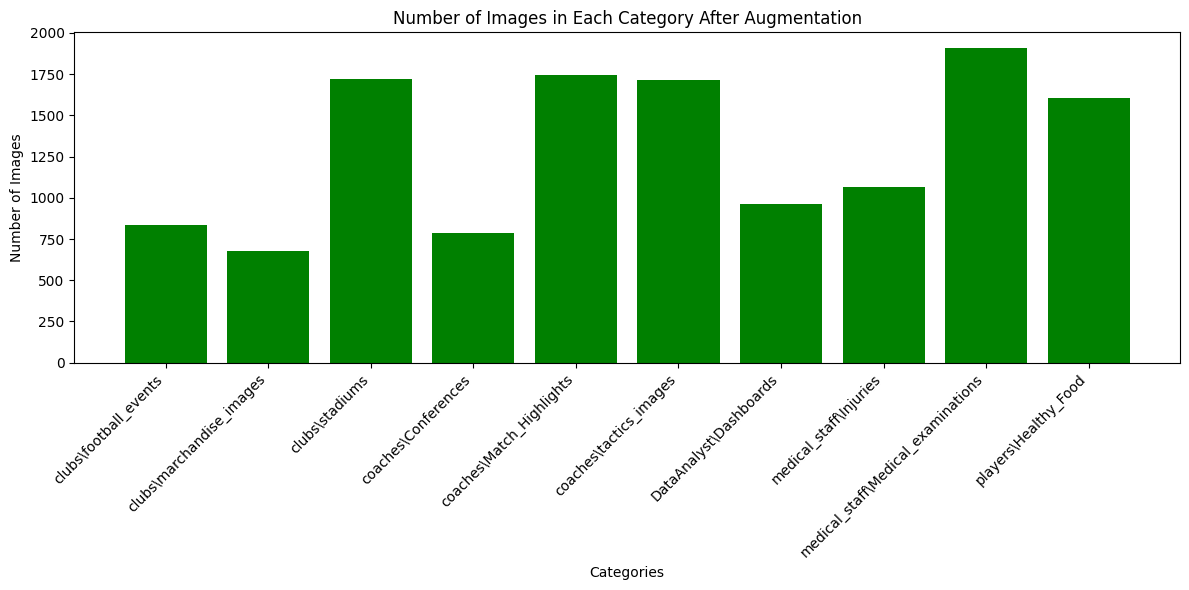

In [111]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset directory (augmented dataset location)
dataset_path = "D:/role_based_recommendation_system/data/augmented"

# Ensure the dataset path exists
if not os.path.exists(dataset_path):
    print(f"❌ Error: The dataset path '{dataset_path}' does not exist. Check the directory structure.")
    exit()

# Function to count images in each category (including subcategories)
def count_images_in_folders(base_path):
    folder_counts = {}

    for root, _, files in os.walk(base_path):
        image_count = sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))
        
        if image_count > 0:
            relative_path = os.path.relpath(root, base_path)
            folder_counts[relative_path] = image_count

    return folder_counts

# Count images after augmentation
augmented_counts = count_images_in_folders(dataset_path)

# If no images are found, print a message and exit
if not augmented_counts:
    print("❌ No images found in the augmented dataset. Please check if augmentation was correctly applied.")
    exit()

# Convert data into DataFrame for visualization
df_augmented = pd.DataFrame({
    "Category": list(augmented_counts.keys()),
    "Number of Images": list(augmented_counts.values())
})

# Display dataset size in a readable table format
print("\n📊 **Dataset Image Counts After Augmentation:**")
print(df_augmented.to_string(index=False))  # Print without default index

# Plot a bar chart to visualize the number of images per category
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_augmented["Category"], df_augmented["Number of Images"], color="green")

ax.set_xlabel("Categories")
ax.set_ylabel("Number of Images")
ax.set_title("Number of Images in Each Category After Augmentation")
ax.set_xticks(range(len(df_augmented["Category"])))
ax.set_xticklabels(df_augmented["Category"], rotation=45, ha="right")

plt.tight_layout()
plt.show()



📊 **Dataset Image Counts Before and After Augmentation:**
                          Category  Before Augmentation  After Augmentation
            DataAnalyst\Dashboards                  189                 960
             clubs\football_events                  139                 834
          clubs\marchandise_images                  113                 678
                    clubs\stadiums                  291                1722
               coaches\Conferences                  203                 786
          coaches\Match_Highlights                  329                1746
            coaches\tactics_images                  286                1716
            medical_staff\Injuries                  178                1068
medical_staff\Medical_examinations                  351                1908
              players\Healthy_Food                  292                1608


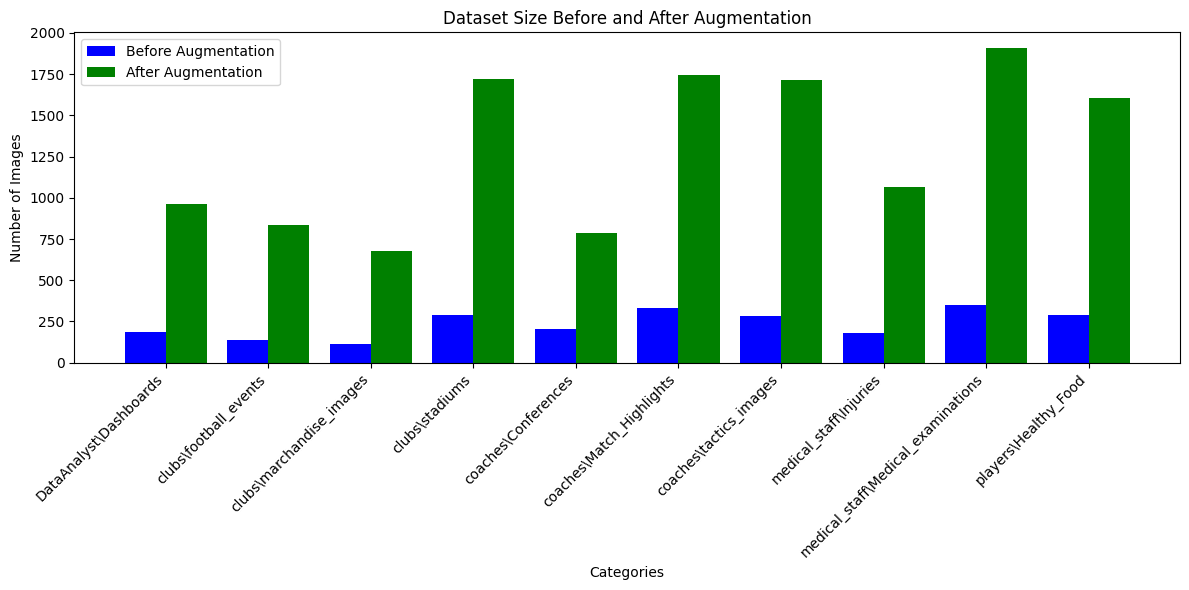

In [113]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset directories
original_dataset_path = "D:/role_based_recommendation_system/data/raw"
augmented_dataset_path = "D:/role_based_recommendation_system/data/augmented"

# Function to count images in each category
def count_images_in_folders(base_path):
    if not os.path.exists(base_path):
        print(f"❌ Error: Dataset path '{base_path}' does not exist.")
        return {}

    folder_counts = {}
    for root, _, files in os.walk(base_path):
        image_count = sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))
        if image_count > 0:
            relative_path = os.path.relpath(root, base_path)
            folder_counts[relative_path] = image_count

    return folder_counts

# Count images before and after augmentation
original_counts = count_images_in_folders(original_dataset_path)
augmented_counts = count_images_in_folders(augmented_dataset_path)

# If no images were found, print an error and exit
if not original_counts and not augmented_counts:
    print("❌ No images found in either dataset. Ensure augmentation was correctly applied.")
else:
    # Merge data into a DataFrame for comparison
    categories = sorted(set(original_counts.keys()) | set(augmented_counts.keys()))
    df_comparison = pd.DataFrame({
        "Category": categories,
        "Before Augmentation": [original_counts.get(cat, 0) for cat in categories],
        "After Augmentation": [augmented_counts.get(cat, 0) for cat in categories]
    })

    # Display dataset size in a readable table format
    print("\n📊 **Dataset Image Counts Before and After Augmentation:**")
    print(df_comparison.to_string(index=False))

    # Plot comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.4
    index = range(len(df_comparison))

    ax.bar(index, df_comparison["Before Augmentation"], bar_width, label="Before Augmentation", color="blue")
    ax.bar([i + bar_width for i in index], df_comparison["After Augmentation"], bar_width, label="After Augmentation", color="green")

    ax.set_xlabel("Categories")
    ax.set_ylabel("Number of Images")
    ax.set_title("Dataset Size Before and After Augmentation")
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(df_comparison["Category"], rotation=45, ha="right")
    ax.legend()

    plt.tight_layout()
    plt.show()


In [115]:
import os
import shutil
import random
from tqdm import tqdm

# Define dataset directories
augmented_dataset_path = "D:/role_based_recommendation_system/data/augmented"
balanced_dataset_path = "D:/role_based_recommendation_system/data/balanced"

# Ensure the balanced dataset directory exists
os.makedirs(balanced_dataset_path, exist_ok=True)

# Function to count images in each category
def count_images_in_folders(base_path):
    folder_counts = {}
    
    for root, _, files in os.walk(base_path):
        image_count = sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))
        if image_count > 0:
            relative_path = os.path.relpath(root, base_path)
            folder_counts[relative_path] = image_count

    return folder_counts

# Get updated image counts after augmentation
augmented_counts = count_images_in_folders(augmented_dataset_path)

# Find the max category size (largest dataset size)
max_size = max(augmented_counts.values())

# Balance dataset by oversampling underrepresented categories
for category, count in tqdm(augmented_counts.items(), desc="Balancing Dataset"):
    category_path = os.path.join(augmented_dataset_path, category)
    balanced_category_path = os.path.join(balanced_dataset_path, category)

    os.makedirs(balanced_category_path, exist_ok=True)

    images = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Copy existing images first
    for img in images:
        shutil.copy(os.path.join(category_path, img), os.path.join(balanced_category_path, img))

    # Duplicate images until the category is balanced
    while len(os.listdir(balanced_category_path)) < max_size:
        random_img = random.choice(images)
        new_filename = f"copy_{len(os.listdir(balanced_category_path))}_{random_img}"
        shutil.copy(os.path.join(category_path, random_img), os.path.join(balanced_category_path, new_filename))

print(f"✅ Dataset balancing complete! All categories now have {max_size} images.")
print("📂 Check 'D:/role_based_recommendation_system/data/balanced' for balanced images.")


Balancing Dataset: 100%|██████████| 10/10 [01:14<00:00,  7.44s/it]

✅ Dataset balancing complete! All categories now have 1908 images.
📂 Check 'D:/role_based_recommendation_system/data/balanced' for balanced images.



📊 **Balanced Dataset Image Counts:**
                          Category  Number of Images
             clubs\football_events              1908
          clubs\marchandise_images              1908
                    clubs\stadiums              1908
               coaches\Conferences              1908
          coaches\Match_Highlights              1908
            coaches\tactics_images              1908
            DataAnalyst\Dashboards              1908
            medical_staff\Injuries              1908
medical_staff\Medical_examinations              1908
              players\Healthy_Food              1908


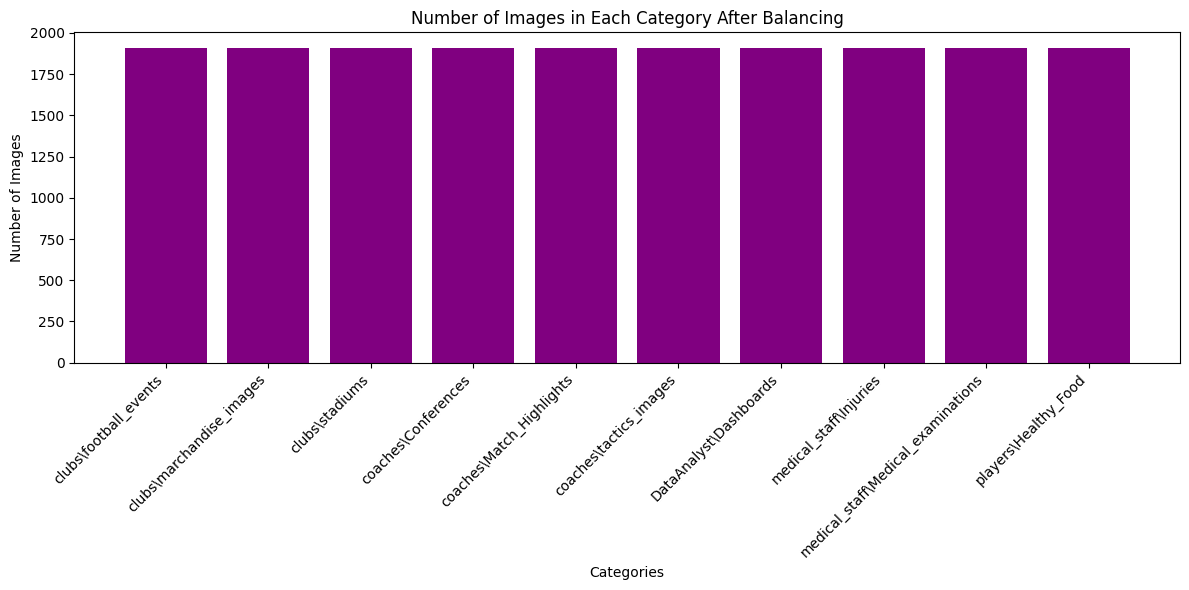

In [117]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset directory (balanced dataset location)
balanced_dataset_path = "D:/role_based_recommendation_system/data/balanced"

# Function to count images in each category (including subcategories)
def count_images_in_folders(base_path):
    if not os.path.exists(base_path):
        print(f"❌ Error: Dataset path '{base_path}' does not exist.")
        return {}

    folder_counts = {}
    for root, _, files in os.walk(base_path):
        image_count = sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))
        if image_count > 0:
            relative_path = os.path.relpath(root, base_path)
            folder_counts[relative_path] = image_count

    return folder_counts

# Count images after balancing
balanced_counts = count_images_in_folders(balanced_dataset_path)

# If no images were found, print an error and exit
if not balanced_counts:
    print("❌ No images found in the balanced dataset. Ensure the balancing process was correctly applied.")
else:
    # Convert data into DataFrame for visualization
    df_balanced = pd.DataFrame({
        "Category": list(balanced_counts.keys()),
        "Number of Images": list(balanced_counts.values())
    })

    # Display dataset size in a readable table format
    print("\n📊 **Balanced Dataset Image Counts:**")
    print(df_balanced.to_string(index=False))

    # Plot a bar chart to visualize the number of images per category after balancing
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(df_balanced["Category"], df_balanced["Number of Images"], color="purple")

    ax.set_xlabel("Categories")
    ax.set_ylabel("Number of Images")
    ax.set_title("Number of Images in Each Category After Balancing")
    ax.set_xticks(range(len(df_balanced["Category"])))
    ax.set_xticklabels(df_balanced["Category"], rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

In [121]:
import os
import shutil
import random
from tqdm import tqdm

# Define dataset directories
balanced_dataset_path = "D:/role_based_recommendation_system/data/balanced"
train_dataset_path = "D:/role_based_recommendation_system/data/train"
val_dataset_path = "D:/role_based_recommendation_system/data/val"
test_dataset_path = "D:/role_based_recommendation_system/data/test"

# Define split ratios
train_ratio = 0.7  # 70% for training
val_ratio = 0.15   # 15% for validation
test_ratio = 0.15  # 15% for testing

# Ensure train, validation, and test directories exist
os.makedirs(train_dataset_path, exist_ok=True)
os.makedirs(val_dataset_path, exist_ok=True)
os.makedirs(test_dataset_path, exist_ok=True)

# Process dataset recursively
for root, dirs, files in tqdm(os.walk(balanced_dataset_path), desc="Splitting Dataset"):
    if files:  # Only process folders that contain images
        # Get relative path to preserve category structure
        relative_path = os.path.relpath(root, balanced_dataset_path)

        # Create corresponding directories in train, val, and test folders
        train_category_path = os.path.join(train_dataset_path, relative_path)
        val_category_path = os.path.join(val_dataset_path, relative_path)
        test_category_path = os.path.join(test_dataset_path, relative_path)

        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(val_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        # Get all image files
        images = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(images)

        # Split into training, validation, and testing
        train_idx = int(len(images) * train_ratio)
        val_idx = train_idx + int(len(images) * val_ratio)
        
        train_images = images[:train_idx]
        val_images = images[train_idx:val_idx]
        test_images = images[val_idx:]

        # Copy images to train directory
        for img in train_images:
            shutil.copy(os.path.join(root, img), os.path.join(train_category_path, img))

        # Copy images to validation directory
        for img in val_images:
            shutil.copy(os.path.join(root, img), os.path.join(val_category_path, img))

        # Copy images to test directory
        for img in test_images:
            shutil.copy(os.path.join(root, img), os.path.join(test_category_path, img))

print("✅ Dataset successfully split into Train, Validation, and Test sets!")
print("📂 Check 'D:/role_based_recommendation_system/data/train', 'D:/role_based_recommendation_system/data/val', and 'D:/role_based_recommendation_system/data/test'.")


Splitting Dataset: 16it [01:33,  5.84s/it]

✅ Dataset successfully split into Train, Validation, and Test sets!
📂 Check 'D:/role_based_recommendation_system/data/train', 'D:/role_based_recommendation_system/data/val', and 'D:/role_based_recommendation_system/data/test'.


,Dataset,Number of Images,Percentage
0,Train,13350,69.968553
1,Validation,2860,14.989518
2,Test,2870,15.041929


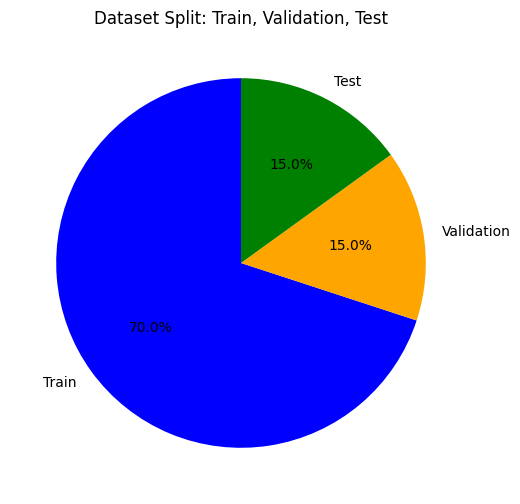

In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset directories
train_dataset_path = "D:/role_based_recommendation_system/data/train"
val_dataset_path = "D:/role_based_recommendation_system/data/val"
test_dataset_path = "D:/role_based_recommendation_system/data/test"

# Function to count total images in a dataset
def count_total_images(base_path):
    total_count = 0
    for root, _, files in os.walk(base_path):
        total_count += sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png')))
    return total_count

# Count images in each dataset
train_count = count_total_images(train_dataset_path)
val_count = count_total_images(val_dataset_path)
test_count = count_total_images(test_dataset_path)
total_count = train_count + val_count + test_count

# Prevent division by zero
if total_count == 0:
    print("❌ No images found in Train, Validation, or Test folders. Ensure the dataset was properly split.")
else:
    # Calculate percentages
    train_percentage = (train_count / total_count) * 100
    val_percentage = (val_count / total_count) * 100
    test_percentage = (test_count / total_count) * 100

    # Create a DataFrame for visualization
    df_split = pd.DataFrame({
        "Dataset": ["Train", "Validation", "Test"],
        "Number of Images": [train_count, val_count, test_count],
        "Percentage": [train_percentage, val_percentage, test_percentage]
    })

    # Display dataset split in a readable table format
    display(df_split)

    # Plot a pie chart to visualize the distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie([train_count, val_count, test_count], labels=["Train", "Validation", "Test"], autopct='%1.1f%%', colors=["blue", "orange", "green"], startangle=90)
    ax.set_title("Dataset Split: Train, Validation, Test")

    plt.show()
